# Prática 1 - Tutorias 08/06 e 10/06/21


## Modelos Lineares Generalizados



## Modelo para óbitos por COVID-19

Na base de dados comorbidades.csv, são apresentados dados reais de uma amostra obtida do seade-R (Fonte dos dados originais: https://github.com/seade-R/dados-covid-sp). Estão disponíveis as seguintes informações:

- Identificação do paciente
- Município
- Código do IBGE
- Idade
- Sexo (1: feminino, 0: masculino)
- Óbito (1: sim, 0: não)
- Comorbidades: asma, cardiopatia, diabetes, doença hematológica, doença renal, doença hepática, doença neurológica, imumodepressão, obesidade, outros fatores de risco, pneumopatia, puérpera, síndrome de down (para cada uma delas 1: presente, 0: ausente)

Os dados faltantes foram excluídos da base original para esta análise específica, considerando que essa exclusão não afeta a representatividade da amostra.

Desenvolva uma análise exploratória para investigar a associação entre idade e óbito, e repita para sexo e óbito. 


Ajuste um modelo de regressão logística com intercepto, considerando as preditoras sexo, idade, asma, cardiopatia, diabetes, doenca_renal, obesidade.


In [1]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
import plotly.express as px


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

pkgdir = '.'


# Dados banco - Leitura dos dados
dados = pd.read_csv(f'{pkgdir}/comorbidades.csv', index_col=0)
dados.reset_index(drop=True, inplace=True)

dados.head()

,nome_munic,codigo_ibge,idade,sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down
0,Ferraz de Vasconcelos,3515707,86,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
1,São Paulo,3550308,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,São José dos Campos,3549904,58,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0
3,Mauá,3529401,54,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,Cajamar,3509205,62,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0


In [3]:
dados.shape

(1182, 18)

In [4]:
dados.columns

Index(['nome_munic', 'codigo_ibge', 'idade', 'sexo', 'obito', 'asma',
       'cardiopatia', 'diabetes', 'doenca_hematologica', 'doenca_hepatica',
       'doenca_neurologica', 'doenca_renal', 'imunodepressao', 'obesidade',
       'outros_fatores_de_risco', 'pneumopatia', 'puerpera',
       'sindrome_de_down'],
      dtype='object')

-Sexo (1: feminino, 0: masculino)

-Óbito (1: sim, 0: não)

<AxesSubplot:xlabel='sexo', ylabel='count'>

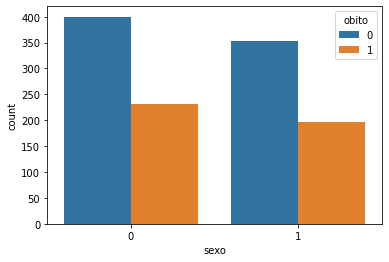

In [5]:
sns.countplot(x=dados.sexo,data=dados, hue='obito')

Proporção de mulheres que morreram

In [6]:
len(dados.loc[(dados['sexo']==1) & (dados['obito']==1)])/len( dados.loc[dados['obito']==1])

0.4592074592074592

Proporção de homens que morreram

In [7]:
len(dados.loc[(dados['sexo']==0) & (dados['obito']==1)])/len( dados.loc[dados['obito']==1])

0.5407925407925408

Text(0.5, 0.98, 'Idade e óbito')

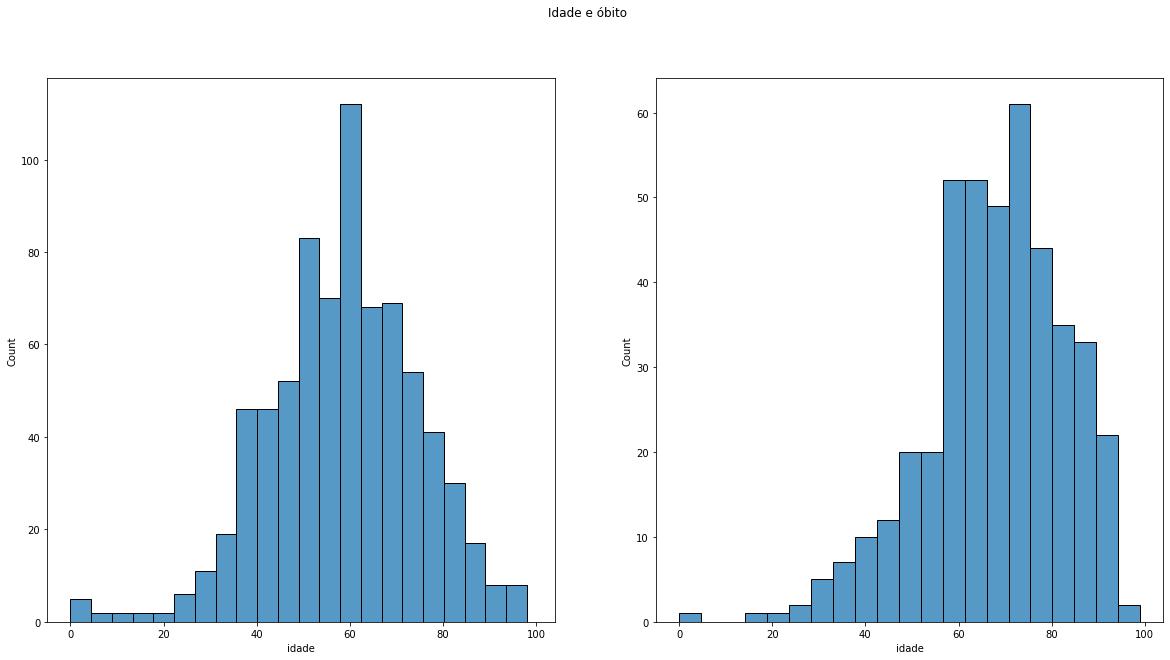

In [8]:
fig, axes = plt.subplots(1,2, sharex=True, figsize=(20,10))
sns.histplot(ax=axes[0],data=dados.loc[dados['obito']==0].idade)
sns.histplot(ax=axes[1],data=dados.loc[dados['obito']==1].idade)
fig.suptitle('Idade e óbito')

### Ajustando um MLG com resposta binária com intercepto

#### Considere a divisão da base em treinamento e teste, deixando 20% das observações para teste

In [9]:
# Adicionar uma coluna de uns referente ao intercepto

n=len(dados)
dados.loc[:,'const']  = np.ones(n).reshape(n,1)


In [10]:
dados

,nome_munic,codigo_ibge,idade,sexo,obito,asma,cardiopatia,diabetes,doenca_hematologica,doenca_hepatica,doenca_neurologica,doenca_renal,imunodepressao,obesidade,outros_fatores_de_risco,pneumopatia,puerpera,sindrome_de_down,const
0,Ferraz de Vasconcelos,3515707,86,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1.0
1,São Paulo,3550308,62,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.0
2,São José dos Campos,3549904,58,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1.0
3,Mauá,3529401,54,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1.0
4,Cajamar,3509205,62,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,São Paulo,3550308,40,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
1178,Campinas,3509502,80,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0
1179,São José do Rio Preto,3549805,44,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.0
1180,São Paulo,3550308,72,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0


In [11]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

In [12]:
preditoras = dados_treino[['const','idade','sexo','asma','cardiopatia','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]

In [13]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      937
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.28
Date:                Tue, 08 Jun 2021   Deviance:                       1150.6
Time:                        20:27:28   Pearson chi2:                     941.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3762      0.351     -9.609   

In [14]:
ajustado = res.predict(preditoras)


In [15]:
X_teste = dados_teste[['const','idade','sexo','asma','cardiopatia','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.1993304697252316

In [17]:
res.aic

1166.5619547074634

**Segundo modelo, excluindo cardiopatia**

In [18]:
preditoras = dados_treino[['const','idade','sexo','asma','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]

In [19]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      938
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.34
Date:                Tue, 08 Jun 2021   Deviance:                       1150.7
Time:                        20:44:56   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3807      0.351     -9.625   

In [20]:
ajustado = res.predict()

In [21]:
X_teste = dados_teste[['const','idade','sexo','asma','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)

0.19943538803697025

In [23]:
res.aic

1164.6752349551355

**Terceiro modelo, excluindo asma**

In [24]:
preditoras = dados_treino[['const','idade','sexo','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]


In [25]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      939
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -575.72
Date:                Tue, 08 Jun 2021   Deviance:                       1151.4
Time:                        20:51:12   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.3842      0.351     -9.651   

In [26]:
ajustado = res.predict()



In [27]:
X_teste = dados_teste[['const','idade','sexo','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.1996224183983691

In [29]:
res.aic

1163.430212617864

**Quarto modelo, excluindo sexo**


In [30]:
preditoras = dados_treino[['const','idade','diabetes','doenca_renal', 'obesidade']]
resposta = dados_treino[['obito']]



In [31]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


ajustado = res.predict()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                  945
Model:                            GLM   Df Residuals:                      940
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -576.23
Date:                Tue, 08 Jun 2021   Deviance:                       1152.5
Time:                        20:51:55   Pearson chi2:                     942.
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4253      0.348     -9.834   

Note que a significância marginal das preditoras que ficaram muda em relação aos modelos anteriores.
Neste momento paramos as exclusões e vamos manter as preditoras.

In [32]:
X_teste = dados_teste[['const','idade','diabetes','doenca_renal', 'obesidade']]
Y_teste = dados_teste[['obito']]

predito = res.predict(X_teste)


In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.2000601841534481

In [34]:
res.aic

1162.4668937333213

**Análise de diagnóstico para o modelo "final", agora com a base toda**

In [35]:
preditoras = dados[['const','idade','diabetes','doenca_renal', 'obesidade']]
resposta = dados[['obito']]

In [36]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
ajustado = res.predict()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  obito   No. Observations:                 1182
Model:                            GLM   Df Residuals:                     1177
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -716.15
Date:                Tue, 08 Jun 2021   Deviance:                       1432.3
Time:                        20:54:54   Pearson chi2:                 1.21e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.5240      0.315    -11.194   

Qual a interpretação dos parâmetros?

Podemos fazê-la com a razão de chances. 

Exemplo: 

- Para a preditora obesidade, $\exp(0.6268) = 1.87$, o que indica um aumento de 87% na chance de óbito para pacientes com obesidade em relação a pacientes que não apresentam essa característica.  

O que é chance? Qual a diferença entre chance e probabilidade?

A chance de ocorrência de um evento é a probabilidade de ocorrência deste evento dividida pela probabilidade da não ocorrência do mesmo evento. 


$c = \dfrac{p}{1-p}$

Dessa maneira, se a probabilidade de ocorrência de um evento é de 80%, então as chances de ocorrência deste evento são de 4 para 1.

E a razão de chances?

A razão de chances é definida como a razão entre a chance de um evento ocorrer em um grupo e a chance de ocorrer em outro grupo. Neste caso, os grupos são definidos pela presença ou não da doença/condição médica.

Uma razão de chances de 1 indica que a condição ou evento sob estudo é igualmente provável de ocorrer nos dois grupos. Uma razão de chances maior do que 1 indica que a condição ou evento tem maior probabilidade de ocorrer no primeiro grupo. Finalmente, uma razão de chances menor do que 1 indica que a probabilidade é menor no primeiro grupo do que no segundo.

Para doença renal:

In [37]:
oc = np.exp(0.4378)
oc

1.549295017428057

In [42]:
oc_d = np.exp( 0.2758)
oc_d

1.317584320809698

Como podemos intepretar essa razão de chances?

Indica um aumento de 54,9% na chance de óbito para pacientes com doença renal em relação a pacientes que não apresentam essa característica.

E no caso da idade que não é binária? Como calculamos seu efeito e o interpretamos?

A razão de chances nesse caso fica

$$\psi =  \dfrac{\pi(X + \Delta)/(1-\pi(X + \Delta))}{\pi(X)/(1-\pi(X))} = \dfrac{e^{\beta *( X + \Delta)}}{e^{\beta * X}} = e^{\beta * \Delta} $$


Para covariáveis numéricas calculamos a OR para uma variação $\Delta$

$$OR = e^{\beta * \Delta}$$

Logo, fixando uma variação de 10 anos na idade temos:

In [38]:
delta = 10
rr_idade_10 = np.exp(0.0432 * delta)
rr_idade_10

1.540335115161127

Como interpretamos?

Se compararmos dois indivíduos com mesmas condições de saúde (diabetes, obesidade e doença renal), mas com uma diferença de idade de 10 anos, o indivíduo mais velho tem um aumento de 54% na chance de óbito quando comparado com indivíduo mais novo.

E para 20 anos?

In [40]:
delta = -10
rr_idade_20 = np.exp(0.0432 * delta)
rr_idade_20

0.6492093766851473

In [41]:
1-rr_idade_20

0.35079062331485267

Qual interpretação?

**Alguns códigos para a análise de diagnóstico.**

In [ ]:
# Gráfico de pontos de alavanca - hii


fig = px.scatter(res.get_hat_matrix_diag())


fig.show()


In [ ]:
# Gráfico de Resíduo Componente do desvio

fig, ax = plt.subplots()
plt.plot(ajustado,res.resid_deviance,  '.')


ax.set_ylabel('Resíduo componente do desvio')
ax.set_xlabel('valor ajustado');

plt.show()


In [ ]:
# x and y given as DataFrame columns


fig = px.scatter(x = ajustado, y=res.resid_deviance)
fig.show()